In [1]:
import cv2 
import os 
import glob 
from numpy import asarray
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from skimage.feature import hog
#from skimage import exposure
img_dir = "D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases" # Enter Directory of all images 

data_path = os.path.join(img_dir,'Malignant case*') 
files = glob.glob(data_path) 

data = [] 

original_data=[]
for f1 in files: 
    img = cv2.imread(f1) 
    v=img
    #make all images (512,512)
    img = cv2.resize(img, (224, 224))
    #remove noise
    img = cv2.GaussianBlur(img,(5,5),0)
   
    
    array = asarray(img)
    #see edges 
    img=Image.fromarray((array))
    final= img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
    img=final+array  
    img=Image.fromarray((img))
    #img = img.filter(ImageFilter.FIND_EDGES)
    # Convert the image to grayscale
    img = img.convert("L")
    img = asarray(img)
    #segmnation
    ret, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    #d, img = hog(img, orientations=9 ,pixels_per_cell=(4, 4)
    #                ,cells_per_block=(2, 2), visualize=True)# multichannel=True
    #img = exposure.rescale_intensity(img, in_range=(0, 10)) 
 
    #append in=mage in data
    data.append(img)
    original_data.append(v)
data

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [2]:
print(files)

['D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (1).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (10).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (100).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (101).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (102).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (103).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (104).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (105).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (106).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (107).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (108).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (109).

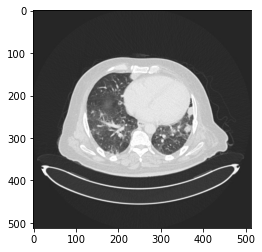

In [3]:
plt.imshow(original_data[10])

In [4]:
img_dir_n = "D:\\dataset_lung_cancer_19_11_2021\\m\\Normal cases" # Enter Directory of all images
data_path_n = os.path.join(img_dir_n,'*g') 
files_n = glob.glob(data_path_n) 
data_n = []
original_data_n=[]
for f2 in files_n: 
    img_n = cv2.imread(f2) 
    
    v_n=img_n
    #make all images (512,512)
    img_n = cv2.resize(img_n, (224, 224))
    #remove noise
    img_n = cv2.GaussianBlur(img_n,(5,5),0)
   
    
    array_n = asarray(img_n)
    #see edges 
    img_n=Image.fromarray((array_n))
    final_n= img_n.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
    img_n=final_n+array_n  
    img_n=Image.fromarray((img_n))
    #img = img.filter(ImageFilter.FIND_EDGES)
    # Convert the image to grayscale
    img_n = img_n.convert("L")
    img_n = asarray(img_n)
    ret, img_n = cv2.threshold(img_n, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    #feature extraction using hog
#     d, img_n = hog(img_n, orientations=9 ,pixels_per_cell=(4, 4)
#                    ,cells_per_block=(2, 2), visualize=True)# multichannel=True
#    img_n = exposure.rescale_intensity(img_n, in_range=(0, 10)) 
 
    #append in=mage in data
    data_n.append(img_n)
    original_data_n.append(v_n)
data_n

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [5]:
data[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
data_n[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
#lenght of data_n 
x = len(data_n)
x

416

In [8]:
#lenght of data
y = len(data)
y

561

In [9]:
#to make label_normal zeros
label_n=np.zeros(x)
n = len(label_n)
label_n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
#normal case lenght
n

416

In [11]:
#to make label_Malignantl ones
label=np.ones(y)
m = len(label)
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [12]:
# Malignant case lenght
m

561

In [13]:
#concatenate to make general array have all cases normal and Malignant 0/1
genaral_labels=np.concatenate((label,label_n ), axis=None)
genaral_labels[3]

1.0

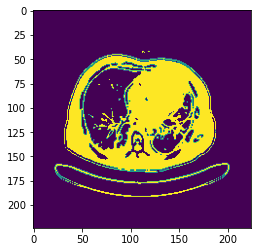

In [14]:
#concatenate to make general array have all cases normal and Malignant images
genaral_data=data+data_n
genaral_data[973]
plt.imshow(genaral_data[0])

In [15]:
o = len(genaral_data)
o

977

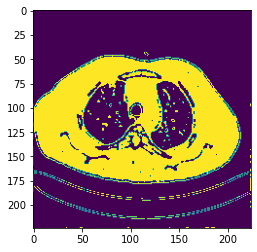

In [16]:
plt.imshow(genaral_data[700])

In [17]:
img.shape

(224, 224)

In [18]:
#make all images (512,512)
#img = cv2.resize(img, (512, 512))

In [19]:
#remove noise
#x = cv2.GaussianBlur(data[0],(5,5),0)
#x

In [20]:
ddepth = cv2.CV_16S
kernel_size = 3
data[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:

#src_gray = cv2.cvtColor(data[0], cv2.COLOR_BGR2GRAY)
#src_gray



In [22]:
#plt.imshow(src_gray)

In [23]:
#dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
#dst

In [24]:
#plt.imshow(dst)

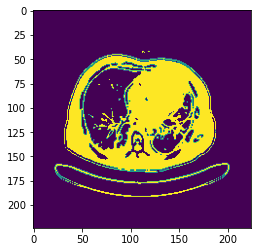

In [25]:
ret, thresh1 = cv2.threshold(data[0], 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
plt.imshow(thresh1)

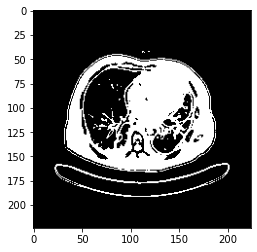

In [26]:
import cv2
import numpy as np

ret, thresh4 = cv2.threshold(data[0], 110, 255, cv2.THRESH_TOZERO)

 
# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images

plt.imshow(thresh4,cmap='gray')


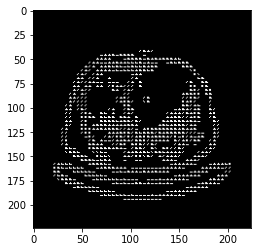

(0.0, 1.0, 0.0, 1.0)

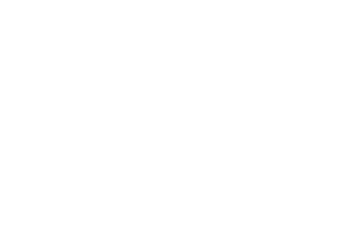

In [27]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

fd, hog_image = hog(data[0], orientations=9 ,pixels_per_cell=(4, 4)
                    ,cells_per_block=(2, 2), visualize=True)# multichannel=True
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray) 

plt.show()
plt.axis("off")
#plt.imshow(hog_image)

In [28]:
x=np.array(genaral_data)
genaral_data=x
x.shape
x[500]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
genaral_data = genaral_data.reshape(-1, 224,224, 1)
#genaral_labels = genaral_labels.reshape(-1, 224,224, 1)
genaral_data.shape, genaral_labels.shape


((977, 224, 224, 1), (977,))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(genaral_data, genaral_data, test_size=0.2)
print(len(X_train),"train +",len(y_test),"test")

781 train + 196 test


In [31]:
y_train.shape

(781, 224, 224, 1)

In [32]:
X_train.shape

(781, 224, 224, 1)

In [33]:
genaral_data.shape

(977, 224, 224, 1)

In [35]:
X_train.shape

(781, 224, 224, 1)

In [36]:
X_test.shape

(196, 224, 224, 1)

In [ ]:
plt.figure(figsize=(30,20))
for index,(genaral_data, genaral_labels) in enumerate(zip(X_train[0:5],y_train[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(genaral_data,(224,224)),cmap='gray')
    plt.title('Training %d' % genaral_labels,fontsize=20)
    plt.plot()

In [37]:
y_train.shape

(781, 224, 224, 1)

In [38]:
genaral_data = genaral_data.reshape(-1, 224,224, 1)
#genaral_labels = genaral_labels.reshape(-1, 224,224, 1)
genaral_data.shape, genaral_labels.shape


((977, 224, 224, 1), (977,))

In [44]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model

from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose,BatchNormalization

from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint

from keras import regularizers
from keras import backend as K
from tensorflow.keras.optimizers import Adam

In [45]:
batch_size = 64
epochs = 10
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (( 224,224,1)))
num_classes = 1

In [46]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [47]:
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

E:\anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [48]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      320       
                                                                 
 batch_normalization_14 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_15 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0   

In [49]:
autoencoder_train = autoencoder.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1)


Epoch 1/10
13/13 [==============================] - 440s 34s/step - loss: -221.3955 - accuracy: 0.5153
Epoch 2/10
13/13 [==============================] - 454s 35s/step - loss: -493.2349 - accuracy: 0.6281
Epoch 3/10
13/13 [==============================] - 455s 35s/step - loss: -630.7237 - accuracy: 0.6335
Epoch 4/10
13/13 [==============================] - 459s 35s/step - loss: -710.0236 - accuracy: 0.6428
Epoch 5/10
13/13 [==============================] - 558s 43s/step - loss: -772.7016 - accuracy: 0.6500
Epoch 6/10
13/13 [==============================] - 537s 41s/step - loss: -828.3398 - accuracy: 0.6537
Epoch 7/10
13/13 [==============================] - 549s 42s/step - loss: -882.4250 - accuracy: 0.6557
Epoch 8/10
13/13 [==============================] - 521s 40s/step - loss: -935.4395 - accuracy: 0.6582
Epoch 9/10
13/13 [==============================] - 543s 42s/step - loss: -986.7786 - accuracy: 0.6584
Epoch 10/10
13/13 [==============================] - 539s 41s/step - loss